# Loading the data set & Exploratory Data Analysis

In [1]:
# Import the required libraries
import os

def read_files(file_path):
   with open(file_path, 'r') as file:
      return file.read()
        
def read_folder(folder_path):
    files=[]
    # Change the directory
    os.chdir(folder_path)
    # Iterate over all the files in the directory
    for file in os.listdir():
        if file.endswith('.txt'):
            # Create the filepath of particular file
            file_path =f"{folder_path}/{file}"
            files.append(read_files(file_path))
    return files
        
# Define the location of the directory
neg=read_folder(folder_path=r"C:/Users/Nasser/Anaconda Work/neg/")
pos=read_folder(folder_path=r"C:/Users/Nasser/Anaconda Work/pos/")



In [2]:
print(len(neg))

1000


In [3]:
print(pos[0])

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from nltk.stem import PorterStemmer
from sklearn import feature_extraction
from sklearn.metrics.pairwise import cosine_similarity  
import os 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
from textblob import Word
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Prepare  Data

In [7]:
neg_data=[]
for i in neg:
    temp=[]
    temp.append(i)
    temp.append(0)
    neg_data.append(temp)

print(neg_data[0])

['plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience memb

In [8]:
pos_data=[]
for i in pos:
    temp=[]
    temp.append(i)
    temp.append(1)
    pos_data.append(temp)

print(pos_data[0])

['films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this see

In [9]:
print(len(neg_data))

1000


In [10]:
print(len(pos_data))

1000


In [11]:
data=pos_data+neg_data
np.random.shuffle(data)
print(len(data))

2000


In [12]:
data=pd.DataFrame(data,columns=['review','label'])

In [13]:
print(data.head(10))

                                              review  label
0  just how inseparable is the team of sgt . \nma...      1
1  there have been bad films in recent years : 'm...      0
2  capsule : suprisingly more of a comedy than a ...      1
3  while watching loser , it occurred to me that ...      0
4   " lake placid " marks yet another entry in th...      0
5  first impressions : critically , a close-to-aw...      0
6  the seasoned capt . dudley smith ( james cromw...      1
7  here i sit at my computer about to write my re...      0
8  to paraphrase a song title from an earlier dis...      1
9  in the company of men made a splash at the sun...      1


In [14]:
print(data.iloc[0].review)

just how inseparable is the team of sgt . 
martin riggs ( mel gibson ) and sgt . 
roger murtaugh ( danny glover ) ? 
let's just say that when one partner asks the other partner to strip to his boxer shorts and then further asks him to run out into the middle of the road , flapping his arms while feverishly cackling like a chicken just to create a distraction , his partner actually does it ! 
the familiar lethal weapon family is back , including rene russo , who is now the expectant mother of riggs' child and joe pesci as the soprana-like , foul-mouthed former accountant who has decided to become a private eye . 
new to the team is chris rock , also a fast-talking , up and coming detective . 
trouble seems to follow the two veteran detectives where ever they go , and in this film , that is no exception . 
even when they are just taking a leisurely boat ride , they somehow manage to collide with a freighter ship . 
we here some ominous music , which clues us that a confrontation is about

# ***Data Exploration***

<AxesSubplot:>

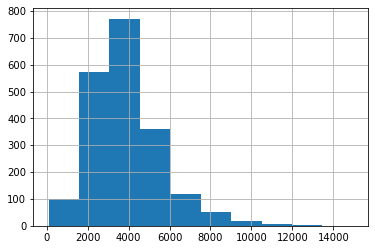

In [15]:
# take a look at the number of characters present in each sentence. This can give us a rough idea about the reviews length.
data['review'].str.len().hist()

The histogram shows that reviews range from 100 to 12000 characters and generally, it is between 20000 to 70000 characters.

<AxesSubplot:>

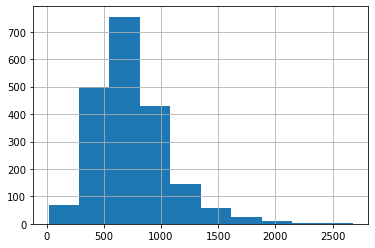

In [16]:
# plot the number of words appearing in each review.
data['review'].str.split().map(lambda x: len(x)).hist()

It is clear that the number of words in each review ranges from 2 to 2000 and mostly falls between 250 to 1500 words.

<AxesSubplot:>

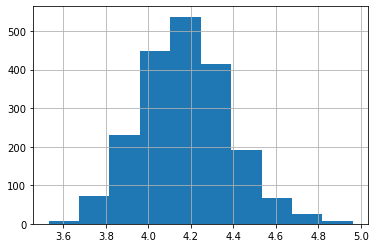

In [17]:
#check the average word length in each sentence.

data['review'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


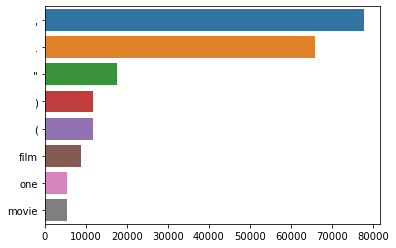

In [18]:
# Most common sentences in data that are not stop words.
from collections import  Counter
import seaborn as sns

nltk.download('stopwords')
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(data['review'])

In [19]:
# N-gram exploration with n = 2,3

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

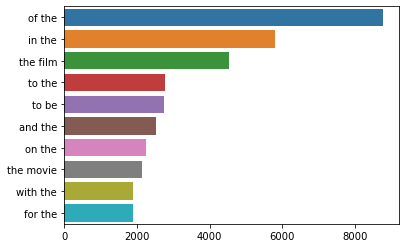

In [20]:
# N-gram exploration with n = 2
top_n_bigrams = get_top_ngram(data['review'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

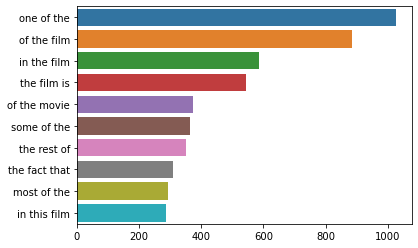

In [21]:
# N-gram exploration with n = 3
top_tri_grams=get_top_ngram(data['review'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [22]:
#pre processing steps like lower case, stemming and lemmatization 
from nltk.corpus import stopwords
nltk.download('wordnet')
data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
st = PorterStemmer()
data['review'] = data['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['review'] =data['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
!pip install wordcloud

## Word Cloud

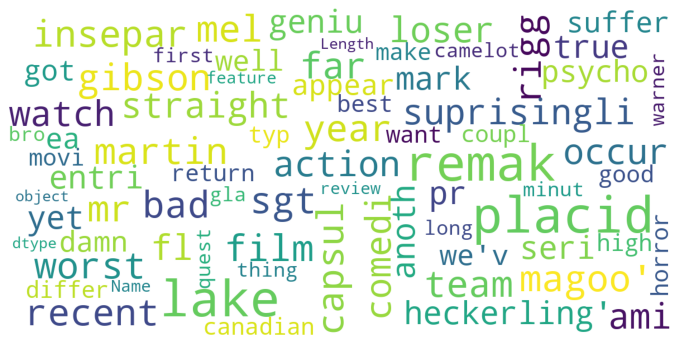

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['review'])

# Data Preprocessing


* Case Normalization
* Remove Stopwords
* Stemming & Lemmatization
* Text Cleaning


In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"'s", " ", text)
    text = re.sub(r"'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"'re", " are ", text)
    text = re.sub(r"'d", " would ", text)
    text = re.sub(r"'ll", " will ", text)
    text = re.sub(r"--", "", text)
    text = re.sub("[^0-9a-zA-Z ]", "" , text)
    text = text.strip(' ')
   
    return text

In [26]:
#pre processing steps like lower case, 
data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

print("\nData after splitting :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after splitting :
 insepar team sgt . martin rigg ( mel gibson ) sgt . roger murtaugh ( danni glover ) ? let' say one partner ask partner strip boxer short ask run middl road , flap arm feverishli cackl like chicken creat distract , partner actual ! familiar lethal weapon famili back , includ rene russo , expect mother riggs' child joe pesci soprana-lik , foul-mouth former account decid becom privat eye . new team chri rock , also fast-talk , come detect . troubl seem follow two veteran detect ever go , film , except . even take leisur boat ride , somehow manag collid freighter ship . omin music , clue u confront happen . gunfir ensu , , detect want learn freighter question chinatown crime lord . although know they'r look , inquisit caus bad guy take action . there' plenti action two movi . led fight sensat jet li , whose martial art skill noth le impress , make sure one find . li ruthless approach , kill anyon make point , develop enorm disdain two detect . terrif car chase , ex

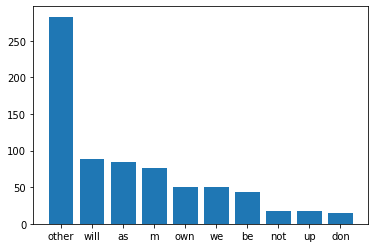

In [27]:
#plot stop words
# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(data['review'])

In [28]:
#remove stop words
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

print("\nData after remove stop words :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after remove stop words :
 insepar team sgt . martin rigg ( mel gibson ) sgt . roger murtaugh ( danni glover ) ? let' say one partner ask partner strip boxer short ask run middl road , flap arm feverishli cackl like chicken creat distract , partner actual ! familiar lethal weapon famili back , includ rene russo , expect mother riggs' child joe pesci soprana-lik , foul-mouth former account decid becom privat eye . new team chri rock , also fast-talk , come detect . troubl seem follow two veteran detect ever go , film , except . even take leisur boat ride , somehow manag collid freighter ship . omin music , clue u confront happen . gunfir ensu , , detect want learn freighter question chinatown crime lord . although know they'r look , inquisit caus bad guy take action . there' plenti action two movi . led fight sensat jet li , whose martial art skill noth le impress , make sure one find . li ruthless approach , kill anyon make point , develop enorm disdain two detect . terrif car ch

In [29]:
# stemming && lemma
st = PorterStemmer()
data['review'] = data['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['review'] =data['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("\nData after stemming :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after stemming :
 insepar team sgt . martin rigg ( mel gibson ) sgt . roger murtaugh ( danni glover ) ? let' say one partner ask partner strip boxer short ask run middl road , flap arm feverishli cackl like chicken creat distract , partner actual ! familiar lethal weapon famili back , includ rene russo , expect mother riggs' child joe pesci soprana-lik , foul-mouth former account decid becom privat eye . new team chri rock , also fast-talk , come detect . troubl seem follow two veteran detect ever go , film , except . even take leisur boat ride , somehow manag collid freighter ship . omin music , clue u confront happen . gunfir ensu , , detect want learn freighter question chinatown crime lord . although know they'r look , inquisit cau bad guy take action . there' plenti action two movi . led fight sensat jet li , whose martial art skill noth le impress , make sure one find . li ruthless approach , kill anyon make point , develop enorm disdain two detect . terrif car chase , expl

In [30]:
# clean text
data['review'] = data['review'].map(lambda com : clean_text(com))
print("\nData after clean text :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))




Data after clean text :
 insepar team sgt  martin rigg  mel gibson  sgt  roger murtaugh  danni glover   let say one partner ask partner strip boxer short ask run middl road  flap arm feverishli cackl like chicken creat distract  partner actual  familiar lethal weapon famili back  includ rene russo  expect mother riggs child joe pesci sopranalik  foulmouth former account decid becom privat eye  new team chri rock  also fasttalk  come detect  troubl seem follow two veteran detect ever go  film  except  even take leisur boat ride  somehow manag collid freighter ship  omin music  clue u confront happen  gunfir ensu   detect want learn freighter question chinatown crime lord  although know theyr look  inquisit cau bad guy take action  there plenti action two movi  led fight sensat jet li  whose martial art skill noth le impress  make sure one find  li ruthless approach  kill anyon make point  develop enorm disdain two detect  terrif car chase  explo gunshot galor  summer action recip follo

In [33]:
new_data=data

In [34]:
print(new_data.count)

<bound method DataFrame.count of                                                  review  label
0     insepar team sgt  martin rigg  mel gibson  sgt...      1
1     bad film recent year  mr  magoo far worst ever...      0
2     capsul  suprisingli comedi straight action fli...      1
3     watch loser  occur ami heckerling true geniu f...      0
4     lake placid  mark yet anoth entri seri  predat...      0
...                                                 ...    ...
1995  remak psycho appear  wev got suffer remak earl...      0
1996  well i will  damn    canadian make good movi  ...      1
1997  return horror high   want coupl differ type mo...      0
1998  best thing   lake placid  80 minut long glad w...      0
1999  quest camelot  warner bro   first featurelengt...      0

[2000 rows x 2 columns]>


In [35]:
print(new_data.iloc[3].review)

watch loser  occur ami heckerling true geniu filmmak cast  fast time ridgemont high  gave u sean penn jeff spicoli  look who talk  turn bruce willi wisecrack babi provid john travolta first career reviv  clueless  found star vehicl ador   alicia silverston  seem understand instinct find perform audienc like spite flaw  unfortun  may also start understand understand  give appeal actor appeal script creat likeabl movi  give appeal actor script appeal is movi make unexpectedli aw film like loser  natur  heckerl make protagonist allaround swell guy  paul tannek  jason bigg  smalltown boy get scholarship nyu  instantli find island compass dilig coldheart big citi  paul kind guy give seat subway elderli woman  roommat adam  zak orth   chri  tom sadoski  noah  jimmi simpson  kind guy blast music let waterb leak paul  paul also kind guy ador girl afar  case love dora diamond  mena suvari   dora problem  includ shortag fund pay tuition relationship professor  edward alcott  greg kinnear   that 

### Split Data

In [36]:
#Splitting data into train and validation
from sklearn import model_selection
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(new_data['review'],new_data['label'])

In [37]:
print(type(train_x))

<class 'pandas.core.series.Series'>


In [38]:
print(len(train_x))

1500


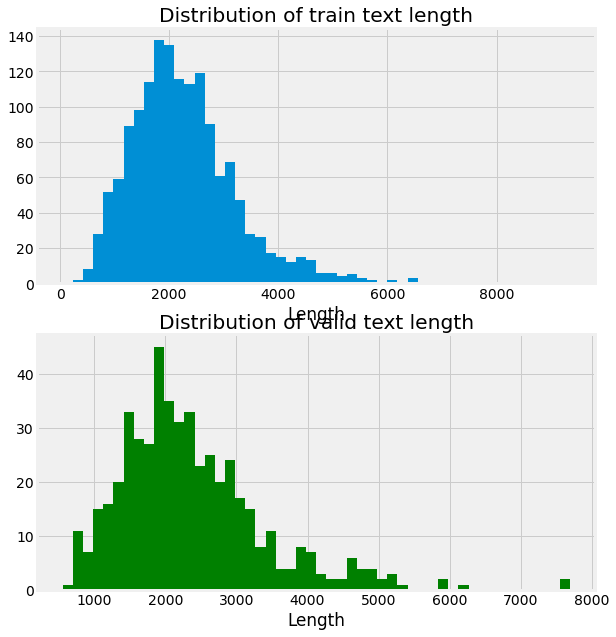

In [39]:
plt.figure(figsize=(10,16))
plt.style.use('fivethirtyeight')

plt.subplot(3,1,1)
train_len = [len(train_x.iloc[i]) for i in range(0,len(train_x))]
plt.hist(train_len,bins=50)
plt.title('Distribution of train text length')
plt.xlabel('Length')

plt.subplot(3,1,2)
valid_len = [len(valid_x.iloc[l]) for l in range(0,len(valid_x))]
plt.hist(valid_len,bins=50,color='green')
plt.title('Distribution of valid text length')
plt.xlabel('Length')

plt.show()

In [40]:
print(train_x.shape)

(1500,)


In [41]:
print(valid_x.shape)

(500,)


In [42]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{3,}', max_features=7000)
tfidf_vect.fit(data['review'].tolist())
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


In [43]:
print(xtrain_tfidf.shape)

(1500, 7000)


In [44]:
print(xtrain_tfidf.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
print(xtrain_tfidf)

  (0, 6940)	0.09386516292766624
  (0, 6938)	0.07630474610965667
  (0, 6933)	0.05330258994051948
  (0, 6924)	0.04683071484525259
  (0, 6901)	0.0592357531659697
  (0, 6873)	0.08285031716487966
  (0, 6859)	0.04606499909592516
  (0, 6835)	0.08167507139825832
  (0, 6808)	0.0798803280091631
  (0, 6788)	0.027634025088042313
  (0, 6781)	0.06573094170298621
  (0, 6703)	0.05503383164493936
  (0, 6651)	0.06308762190116732
  (0, 6640)	0.06525362222079878
  (0, 6623)	0.07464253917835659
  (0, 6619)	0.034048419221540734
  (0, 6563)	0.07825678512832888
  (0, 6553)	0.04524280860333006
  (0, 6509)	0.07320216265575695
  (0, 6488)	0.02841287192854763
  (0, 6477)	0.034422301054954044
  (0, 6468)	0.062220233438840054
  (0, 6409)	0.06347332080559703
  (0, 6332)	0.07208841264974043
  (0, 6301)	0.04528745949963507
  :	:
  (1499, 507)	0.017123553372914577
  (1499, 484)	0.15983291815243353
  (1499, 445)	0.014950873026586362
  (1499, 417)	0.025786023187279187
  (1499, 414)	0.022172051762042847
  (1499, 411)	0.02

# Model Training and testing

In [46]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [83]:
Model_Names=[]
Model_Accuarcy=[]

In [84]:
def train_model(classifier, xtrain_tfidf, train_y, xvalid_tfidf,valid_y ):
    # fit the training dataset on the classifier
    classifier.fit(xtrain_tfidf, train_y)
    predictions = classifier.predict(xvalid_tfidf)
    accuracy= metrics.accuracy_score(predictions, valid_y)
    print ("Accuracy: ", accuracy)
    #Evaluation: Confusion matrix and Precision and Recall
    print("Confusion matrix:",metrics.confusion_matrix(valid_y,predictions))
    print(" report:",metrics.classification_report(valid_y,predictions))
    Check=True
    for x in Model_Names:
        if x==str(classifier):
            Check=False
    if Check:
        Model_Names.append(str(classifier))
        Model_Accuarcy.append(accuracy)
    return classifier
    

In [100]:
# LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.05)
classifier=train_model(linear_model.LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.05), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.846
Confusion matrix: [[215  42]
 [ 35 208]]
 report:               precision    recall  f1-score   support

           0       0.86      0.84      0.85       257
           1       0.83      0.86      0.84       243

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [185]:
print(Model_Names[0])
print(Model_Accuarcy[0])

LogisticRegression(l1_ratio=0.05, penalty='elasticnet', solver='saga')
0.846


In [98]:
# LogisticRegression()
classifier=train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)



Accuracy:  0.844
Confusion matrix: [[212  45]
 [ 33 210]]
 report:               precision    recall  f1-score   support

           0       0.87      0.82      0.84       257
           1       0.82      0.86      0.84       243

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500



In [104]:
# LogisticRegression(solver='newton-cg')
classifier=train_model(linear_model.LogisticRegression(solver='newton-cg'), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)



Accuracy:  0.844
Confusion matrix: [[212  45]
 [ 33 210]]
 report:               precision    recall  f1-score   support

           0       0.87      0.82      0.84       257
           1       0.82      0.86      0.84       243

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500



In [105]:
from sklearn.svm import LinearSVC
# (LinearSVC(C=5.0)
classifier=train_model(LinearSVC(C=5.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)



Accuracy:  0.85
Confusion matrix: [[219  38]
 [ 37 206]]
 report:               precision    recall  f1-score   support

           0       0.86      0.85      0.85       257
           1       0.84      0.85      0.85       243

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [106]:
from sklearn.svm import LinearSVC
#LinearSVC()
classifier=train_model(LinearSVC(), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.852
Confusion matrix: [[220  37]
 [ 37 206]]
 report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86       257
           1       0.85      0.85      0.85       243

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [107]:
from sklearn.svm import LinearSVC
# LinearSVC(C=1.2)
classifier=train_model(LinearSVC(C=1.2), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.854
Confusion matrix: [[222  35]
 [ 38 205]]
 report:               precision    recall  f1-score   support

           0       0.85      0.86      0.86       257
           1       0.85      0.84      0.85       243

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [108]:
from sklearn.svm import LinearSVC
# LinearSVC(C=1.22
classifier=train_model(LinearSVC(C=1.22), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.854
Confusion matrix: [[222  35]
 [ 38 205]]
 report:               precision    recall  f1-score   support

           0       0.85      0.86      0.86       257
           1       0.85      0.84      0.85       243

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [109]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=train_model(DecisionTreeClassifier(), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.618
Confusion matrix: [[168  89]
 [102 141]]
 report:               precision    recall  f1-score   support

           0       0.62      0.65      0.64       257
           1       0.61      0.58      0.60       243

    accuracy                           0.62       500
   macro avg       0.62      0.62      0.62       500
weighted avg       0.62      0.62      0.62       500



In [110]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=train_model(DecisionTreeClassifier(criterion="entropy", max_depth=7), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.682
Confusion matrix: [[155 102]
 [ 57 186]]
 report:               precision    recall  f1-score   support

           0       0.73      0.60      0.66       257
           1       0.65      0.77      0.70       243

    accuracy                           0.68       500
   macro avg       0.69      0.68      0.68       500
weighted avg       0.69      0.68      0.68       500



In [111]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=train_model(DecisionTreeClassifier(criterion="entropy", max_depth=6), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.664
Confusion matrix: [[124 133]
 [ 35 208]]
 report:               precision    recall  f1-score   support

           0       0.78      0.48      0.60       257
           1       0.61      0.86      0.71       243

    accuracy                           0.66       500
   macro avg       0.69      0.67      0.65       500
weighted avg       0.70      0.66      0.65       500



In [112]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=train_model(DecisionTreeClassifier(criterion="entropy", max_depth=9), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

Accuracy:  0.664
Confusion matrix: [[148 109]
 [ 59 184]]
 report:               precision    recall  f1-score   support

           0       0.71      0.58      0.64       257
           1       0.63      0.76      0.69       243

    accuracy                           0.66       500
   macro avg       0.67      0.67      0.66       500
weighted avg       0.67      0.66      0.66       500



In [113]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=train_model(KNeighborsClassifier(n_neighbors=3), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.674
Confusion matrix: [[164  93]
 [ 70 173]]
 report:               precision    recall  f1-score   support

           0       0.70      0.64      0.67       257
           1       0.65      0.71      0.68       243

    accuracy                           0.67       500
   macro avg       0.68      0.68      0.67       500
weighted avg       0.68      0.67      0.67       500



In [114]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=train_model(KNeighborsClassifier(n_neighbors=5), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.706
Confusion matrix: [[173  84]
 [ 63 180]]
 report:               precision    recall  f1-score   support

           0       0.73      0.67      0.70       257
           1       0.68      0.74      0.71       243

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.71      0.71      0.71       500



In [115]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=train_model(KNeighborsClassifier(n_neighbors=7), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.722
Confusion matrix: [[172  85]
 [ 54 189]]
 report:               precision    recall  f1-score   support

           0       0.76      0.67      0.71       257
           1       0.69      0.78      0.73       243

    accuracy                           0.72       500
   macro avg       0.73      0.72      0.72       500
weighted avg       0.73      0.72      0.72       500



In [116]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=train_model(KNeighborsClassifier(n_neighbors=8), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.72
Confusion matrix: [[194  63]
 [ 77 166]]
 report:               precision    recall  f1-score   support

           0       0.72      0.75      0.73       257
           1       0.72      0.68      0.70       243

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.72      0.72      0.72       500



In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier=train_model(RandomForestClassifier(n_estimators=100), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.798
Confusion matrix: [[215  42]
 [ 59 184]]
 report:               precision    recall  f1-score   support

           0       0.78      0.84      0.81       257
           1       0.81      0.76      0.78       243

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



In [118]:
from sklearn.ensemble import RandomForestClassifier
classifier=train_model(RandomForestClassifier(n_estimators=70), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.804
Confusion matrix: [[218  39]
 [ 59 184]]
 report:               precision    recall  f1-score   support

           0       0.79      0.85      0.82       257
           1       0.83      0.76      0.79       243

    accuracy                           0.80       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.81      0.80      0.80       500



In [119]:
from sklearn.ensemble import RandomForestClassifier
classifier=train_model(RandomForestClassifier(n_estimators=150), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.812
Confusion matrix: [[216  41]
 [ 53 190]]
 report:               precision    recall  f1-score   support

           0       0.80      0.84      0.82       257
           1       0.82      0.78      0.80       243

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [120]:
# SGDClassifier trained with the hinge loss, equivalent to a linear SVM.

from sklearn.linear_model import SGDClassifier
classifier=train_model(SGDClassifier(loss="hinge", penalty="l2", max_iter=6), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


Accuracy:  0.852
Confusion matrix: [[216  41]
 [ 33 210]]
 report:               precision    recall  f1-score   support

           0       0.87      0.84      0.85       257
           1       0.84      0.86      0.85       243

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [121]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=train_model(GradientBoostingClassifier(), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

Accuracy:  0.798
Confusion matrix: [[203  54]
 [ 47 196]]
 report:               precision    recall  f1-score   support

           0       0.81      0.79      0.80       257
           1       0.78      0.81      0.80       243

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



In [122]:

from sklearn.ensemble import GradientBoostingClassifier
classifier=train_model(GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_features=2, max_depth=2, random_state=0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

Accuracy:  0.51
Confusion matrix: [[ 13 244]
 [  1 242]]
 report:               precision    recall  f1-score   support

           0       0.93      0.05      0.10       257
           1       0.50      1.00      0.66       243

    accuracy                           0.51       500
   macro avg       0.71      0.52      0.38       500
weighted avg       0.72      0.51      0.37       500



# Data Visualization:

In [123]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                metrics.confusion_matrix(valid_y,predictions).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     metrics.confusion_matrix(valid_y,predictions).flatten()/np.sum(metrics.confusion_matrix(valid_y,predictions))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(metrics.confusion_matrix(valid_y,predictions), annot=labels,annot_kws={'size': 10}, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

NameError: name 'predictions' is not defined

In [127]:
RData=np.array([[Model_Names],[Model_Accuarcy]])
head(RData)

NameError: name 'head' is not defined

In [187]:
import pandas as pd

dataframe=pd.DataFrame(Model_Names,columns=['Model']) 
dataframe['Accuracy']=Model_Accuarcy

In [188]:
dataframe.head()

,Model,Accuracy
0,"LogisticRegression(l1_ratio=0.05, penalty='ela...",1
1,LogisticRegression(),1
2,LogisticRegression(solver='newton-cg'),1
3,LinearSVC(C=5.0),1
4,LinearSVC(),1


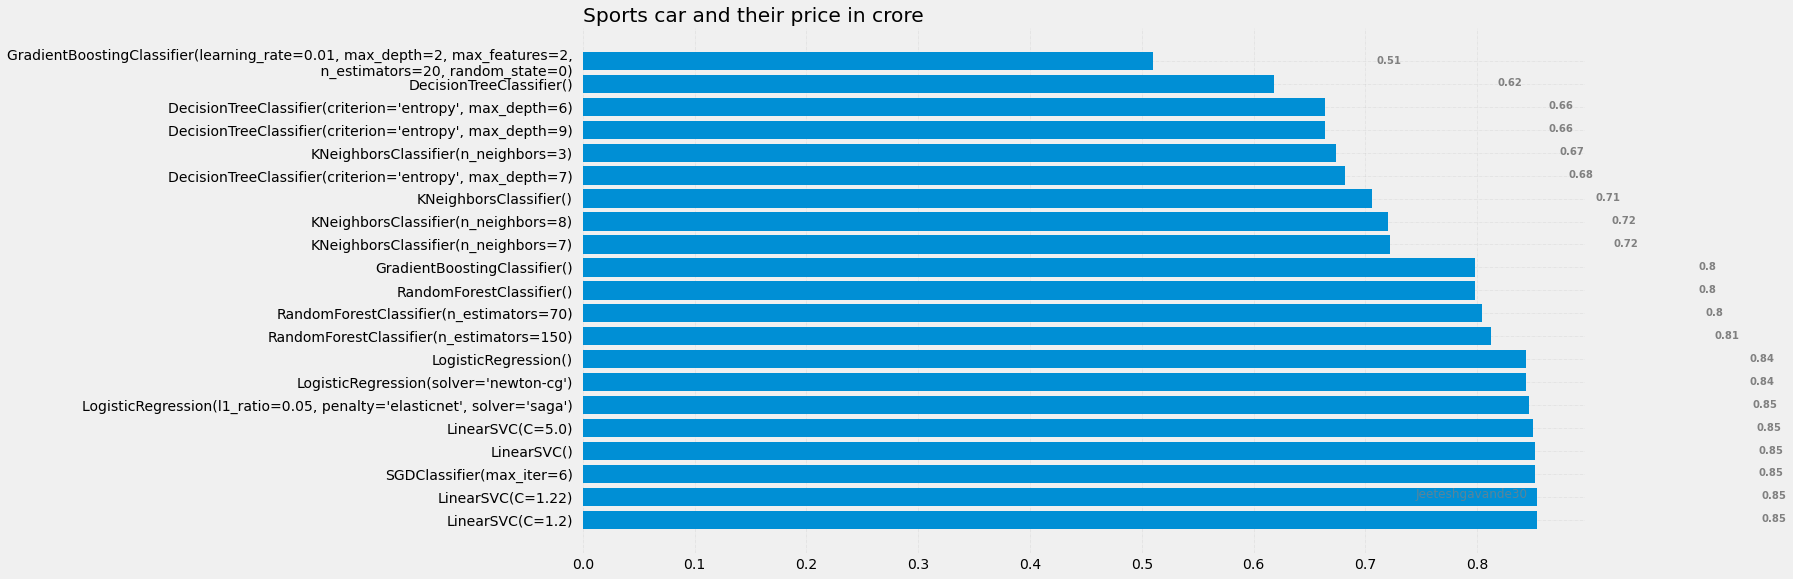

In [174]:
#Figure Size
data_sorted = dataframe.sort_values(by='Accuracy', ascending=True)
dataframe=data_sorted
name=dataframe['Model']
price=dataframe['Accuracy']

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [175]:
!pip install wget

  Using cached wget-3.2.zip (10 kB)
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=5b6a926c616d037c9e6b3366d317215db252c51931bc1a5f571837e630aed91c
  Stored in directory: c:\users\nasser\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [176]:
import wget
wget.download('https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz')

'review_polarity.tar.gz'

In [178]:
import shutil
shutil.unpack_archive('review_polarity.tar.gz', './')

In [184]:
import shutil

shutil.move(os.getcwd(),'./')

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Nasser\\Anaconda Work\\pos' -> './'